# TP1: Régression linéaire simple - Etude de la hauteur d'eucalyptus

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
#Importation du dataset et lecture des données
Euca=pd.read_csv("eucalyptus.txt",sep=';')

On visualise les données:

In [4]:
Euca.describe()

,numero,ht,circ,bloc
count,1429.000000,1429.000000,1429.000000,1429.000000
mean,883.216935,21.212386,47.347796,1.852344
std,501.575922,2.490516,8.489743,0.754002
min,1.000000,11.250000,26.000000,1.000000
25%,449.000000,19.750000,42.000000,1.000000
50%,893.000000,21.750000,48.000000,2.000000
75%,1318.000000,23.000000,54.000000,2.000000
max,1737.000000,27.750000,77.000000,3.000000


In [5]:
Euca.head()

,numero,ht,circ,bloc,clone
0,1,18.25,36,1,L2-123
1,2,19.75,42,1,L2-123
2,3,16.50,33,1,L2-123
3,4,18.25,39,1,L2-123
4,5,19.50,43,1,L2-123


### 1. Traitement du modèle $ht=\beta_{1}+\beta_{2}circ+\epsilon$

In [6]:
X=sm.add_constant(Euca['circ'])
Y=Euca['ht']

In [7]:
print(X)

      const  circ
0       1.0    36
1       1.0    42
2       1.0    33
3       1.0    39
4       1.0    43
...     ...   ...
1424    1.0    37
1425    1.0    41
1426    1.0    50
1427    1.0    37
1428    1.0    40

[1429 rows x 2 columns]


In [8]:
model=sm.OLS(Y,X) #Création du modèle

In [9]:
resultats=model.fit() #Application de la régression linéaire au modèle
print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4732.
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        11:30:08   Log-Likelihood:                -2286.2
No. Observations:                1429   AIC:                             4576.
Df Residuals:                    1427   BIC:                             4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0375      0.180     50.264      0.0

Interprétons les données obtenues via la fonction summary().
On remarque dans un premier temps que les coefficients $R^2$ et $R^2$ ajusté sont égaux, pour une valeur de $0,768$. On peut alors observer une bonne corrélation entre la circonférence et la taille d'un eucalyptus.

On observe également en valeurs intéressantes la donnée **$Prob (F-statistic)$** égale à $0$ et un score de *log-vraisemblance* de $-2300$ environ(plutôt bien négatif, mais ce n'est pas forcément un problème. Avec notre jeu de données, un *$Log-likelihood$* beaucoup plus négatif, de l'ordre du $-20000$, serait probablement bien plus problématique.)
La statistique $F$ est donc bien adaptée au modèle grâce à la donnée évoquée ci-dessus.

Penchons-nous ensuite sur les coefficients **const** et **circ**. Ils nous donnent respectivement une estimation de la taille et la circonférence d'un eucalyptus, pour des **std-error** de $0,18$ et $0,04$ respectivement.

Notre modèle estime bien la circonférence d'un eucalyptus, mais moins bien sa taille (on a une erreur 45 fois plus importante!)

Remarquons aussi que $P > \left| t \right| =0$. Cela signifie que l'observation effectuée pour l'estimateur choisi ne dépend pas du tout du hasard. Notre modèle semble en conséquence plutôt efficace sur cet aspect, puisque nos 2 estimateurs ont un $P > \left| t \right| =0$.

Notons également que la fonction **summary()** nous construit l'intervalle de confiance à $95$% pour le modèle considéré.

In [10]:
#### Calcul "à la main" des coefficients (question 6) ####

Circ=Euca['circ']
Ht=Euca['ht']
MCirc=np.mean(Circ)
MHt=np.mean(Ht)
n=np.size(Circ)

#Calcul du coefficient de corrélation
R2=((np.sum((Circ-MCirc)*(Ht-MHt))**2))/(((Circ-MCirc)@(Circ-MCirc))*((Ht-MHt)@(Ht-MHt)))
print('score R²=',R2)

#Calcul des estimateurs Beta1 et Beta2
ebeta2=(np.sum((Circ-MCirc)*(Ht-MHt)))/(np.sum((Circ-MCirc)**2))
ebeta1=MHt-ebeta2*MCirc
print('Estimateur de B1=',ebeta1,'\nEstimateur de B2=',ebeta2)

#Calcul des estimateurs des variances de Beta1 et Beta2
esigma2=(1/(n-2))*(np.sum((Ht-ebeta1-ebeta2*Circ)**2))
esb1=esigma2*((np.sum(Circ**2))/(n*np.sum((Circ-MCirc)**2)))
esb2=esigma2/np.sum((Circ-MCirc)**2)

#Calcul des intervalles de confiance des estimateurs de Beta1 et Beta2
#On rajoute float ici pour éviter que Python ne donne des outputs de la forme np.float64(x), et avoir un affichage moins chargé.

ICB1=[float(ebeta1-st.t.ppf(0.975,n-2)*np.sqrt(esb1)),float(ebeta1+st.t.ppf(0.975,n-2)*np.sqrt(esb1))]
ICB2=[float(ebeta2-st.t.ppf(0.975,n-2)*np.sqrt(esb2)),float(ebeta2+st.t.ppf(0.975,n-2)*np.sqrt(esb2))]
print('Intervalle de confiance de Beta1:',ICB1,'\nIntervalle de confiance de Beta2:',ICB2)

score R²= 0.7683202384330654
Estimateur de B1= 9.037475668452766 
Estimateur de B2= 0.257137855007109
Intervalle de confiance de Beta1: [8.684771882981005, 9.390179453924526] 
Intervalle de confiance de Beta2: [0.24980549891849482, 0.2644702110957232]


On retrouve les valeurs données par la fonction **summary()**, arrondies à $10^{-3}$ près.

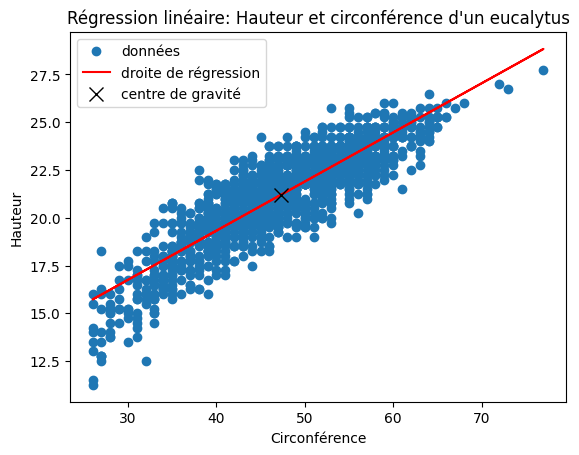

In [11]:
# Affichage de la droite de régression

fig = plt.figure()
plt.plot(Circ, Ht, 'o', label='données')
plt.plot(Circ, ebeta1 + ebeta2 * Circ, color='red', label='droite de régression')
plt.plot(MCirc, MHt, 'kx', markersize=10, label='centre de gravité')
plt.legend()
plt.xlabel('Circonférence')
plt.ylabel('Hauteur')
plt.title("Régression linéaire: Hauteur et circonférence d'un eucalytus")
plt.show()

### 2. Traitement du modèle $ht=\beta_{1}+\beta_{2}\sqrt{circ}+\epsilon$

In [12]:
RX=np.sqrt(X)
model1=sm.OLS(Y,RX)
resultats1=model1.fit()
print(resultats1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     5121.
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        11:30:08   Log-Likelihood:                -2242.5
No. Observations:                1429   AIC:                             4489.
Df Residuals:                    1427   BIC:                             4500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7304      0.336     -8.126      0.0

In [13]:
SqrtCirc=np.sqrt(Euca['circ'])
Ht=Euca['ht']
MSqrtCirc=np.mean(SqrtCirc)
MHt=np.mean(Ht)
n=np.size(Circ)

#Calcul du coefficient de corrélation
r2=((np.sum((SqrtCirc-MSqrtCirc)*(Ht-MHt))**2))/(((SqrtCirc-MSqrtCirc)@((SqrtCirc-MSqrtCirc))*((Ht-MHt)@(Ht-MHt))))
print('score R²=',r2)

#Calcul des estimateurs Beta1 et Beta2
Ebeta2=(np.sum((SqrtCirc-MSqrtCirc)*(Ht-MHt)))/(np.sum((SqrtCirc-MSqrtCirc)**2))
Ebeta1=MHt-Ebeta2*MSqrtCirc
print('Estimateur de B1=',Ebeta1,'\nEstimateur de B2=',Ebeta2)

#Calcul des estimateurs des variances de Beta1 et Beta2
Esigma2=(1/(n-2))*(np.sum((Ht-Ebeta1-Ebeta2*SqrtCirc)**2))
Esb1=Esigma2*((np.sum(SqrtCirc**2))/(n*np.sum((SqrtCirc-MSqrtCirc)**2)))
Esb2=Esigma2/np.sum((SqrtCirc-MSqrtCirc)**2)

#Calcul des intervalles de confiance des estimateurs de Beta1 et Beta2
ICB1=[float(Ebeta1-st.t.ppf(0.975,n-2)*np.sqrt(Esb1)),float(Ebeta1+st.t.ppf(0.975,n-2)*np.sqrt(Esb1))]
ICB2=[float(Ebeta2-st.t.ppf(0.975,n-2)*np.sqrt(Esb2)),float(Ebeta2+st.t.ppf(0.975,n-2)*np.sqrt(Esb2))]
print('Intervalle de confiance de Beta1:',ICB1,'\nIntervalle de confiance de Beta2:',ICB2)

score R²= 0.7820637720850067
Estimateur de B1= -2.730364194330882 
Estimateur de B2= 3.4942393544589
Intervalle de confiance de Beta1: [-3.389694451744034, -2.0710339369177295] 
Intervalle de confiance de Beta2: [3.398420025709298, 3.5900586832085017]


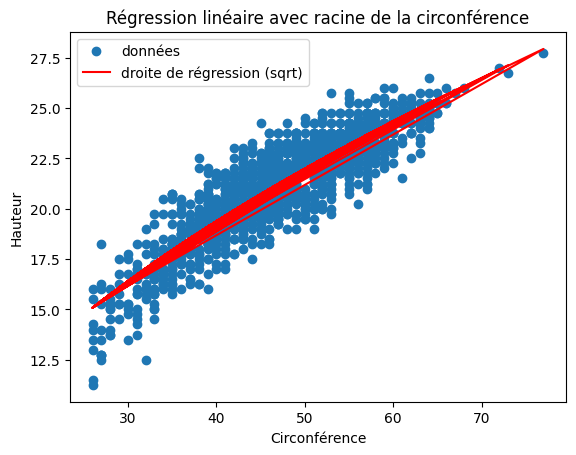

In [14]:
#Création d'un nuage de points avec la droite de régression associée

fig1=plt.figure()
plt.plot(Circ,Ht,'o',label='données')
plt.plot(Circ,Ebeta1+Ebeta2*SqrtCirc,color='red',label='droite de régression (sqrt)')
plt.xlabel('Circonférence')
plt.ylabel('Hauteur')
plt.title("Régression linéaire avec racine de la circonférence")
plt.legend()
plt.show()

Un problème se présente ici: si l'on procède simplement comme le tracé de la droite de régression du modèle précédent dans notre nouveau contexte, on aura en output un graphe dont la droite de régression n'est plus une droite. Cela ressemble à une superposition de plusieurs courbes, ou une seule courbe qui semble faire des allers-retours entre 2 points. Cet affichage étrange nous empêche d'évaluer correctement la pertinence du nouveau modèle choisi.

Je soupçonne que ce comportement est dû à la fonction racine appliquée à la circonférence. Notre courbe de régression n'est en conséquence plus linéaire: il va falloir adapter le choix des points pour construire la droite de régression de notre nouveau modèle. Une solution possible pour contourner ce problème semble être la création d'un vecteur abscisse de la forme **np.linspace()** entre la plus petite circonférence mesurée et la plus grande (voir graphe ci-dessous). 

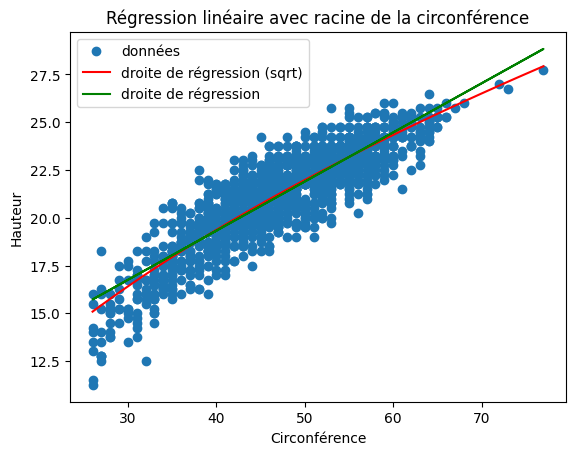

In [15]:
#Adaptation de la droite de régression

absc_Circ=np.linspace(np.min(Circ),np.max(Circ))
Sqrtabsc_Circ=np.sqrt(absc_Circ)
Ht_pred=Ebeta1+Ebeta2*Sqrtabsc_Circ

fig2=plt.figure()
plt.plot(Circ,Ht,'o',label='données')
plt.plot(absc_Circ,Ht_pred,color='red',label='droite de régression (sqrt)')
plt.plot(Circ,ebeta1+ebeta2*Circ,color='green',label='droite de régression')
plt.xlabel('Circonférence')
plt.ylabel('Hauteur')
plt.title("Régression linéaire avec racine de la circonférence")
plt.legend()
plt.show()

En observant les 2 droites de régression sur le même graphe, remarquons qu'en utilisant plutôt $\sqrt{circ}$ dans le modèle de régression que $circ$, notre ordonnée à l'origine est plus faible. Nous nous retrouvons alors avec plus de points rerprésentant des valeurs faibles de circonférence au-dessus de la droite de régression.

Nous pourrions dans ce cas supposer qu'un critère intéressant pour évaluer la pertinence d'un modèle face à des valeurs extrêmes de notre jeu de données porte sur la valeur de l'estimateur $\hat{\beta_{1}}$. Etant plus faible dans notre second modèle, celui qui semble visuellement le plus adapté, ce critère complète bien les autres données récoltées via le **summary()** de notre 2ème modèle: notre score $R^2$ est légèrement plus élevé que précédemment, le **log-likelihood** est lui-aussi légèrement meilleur.